In [1]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler, SMOTE
import numpy as np
import seaborn as sns


In [3]:
# Mount Google Drive
drive.mount('/content/drive')

# Set path to directory containing images
path = "/content/drive/MyDrive/Colab Notebooks/ISSM-PM/data"

Mounted at /content/drive


In [4]:
os.listdir(path)

['invalid_action', 'right', 'left', 'left_pinhole', 'right_pinhole']

In [5]:
os.chdir(path)
!ls

invalid_action	left  left_pinhole  right  right_pinhole


In [6]:
data = []
labels = []
action_labels = ['others',	'left', 'left_pinhole', 'right', 'right_pinhole']

In [7]:
for cls in os.listdir(path):
  img_path = path + "/" + cls
  images = os.listdir(img_path)
  for filename in images:
    if filename.endswith(".jpg"):
      img = Image.open(os.path.join(img_path, filename))
      img = img.convert('L')
      img = img.resize((128,128))
      data.append(np.asarray(img))
      labels.append(cls)

In [8]:
data = np.array(data)
labels = np.array(labels)

In [9]:
n_samples, height, width = data.shape
data = data.reshape(n_samples, height * width)

In [10]:
# Encode the labels
encoder = LabelEncoder()
labels = encoder.fit_transform(labels)

In [18]:
np.count_nonzero(labels == 4)
#np.count_nonzero(labels == 1)
#np.count_nonzero(labels == 2)
#np.count_nonzero(labels == 3)


14

<Axes: ylabel='count'>

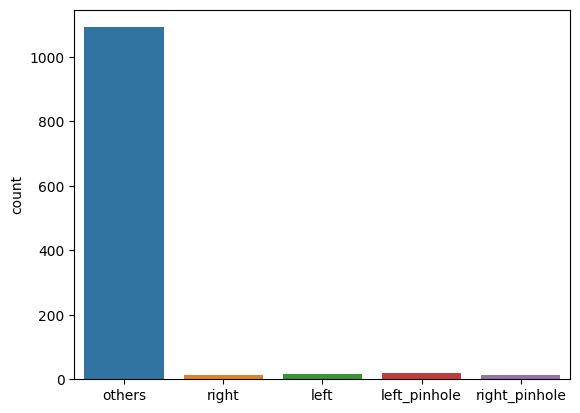

In [ ]:
sns.countplot(x=[action_labels[x] for x in labels])

In [20]:
# create an instance of the SMOTE oversampler
smote = SMOTE(random_state=42)
data_resampled, labels_resampled = smote.fit_resample(data, labels)

In [23]:
np.count_nonzero(labels_resampled == 1)

1092

<Axes: ylabel='count'>

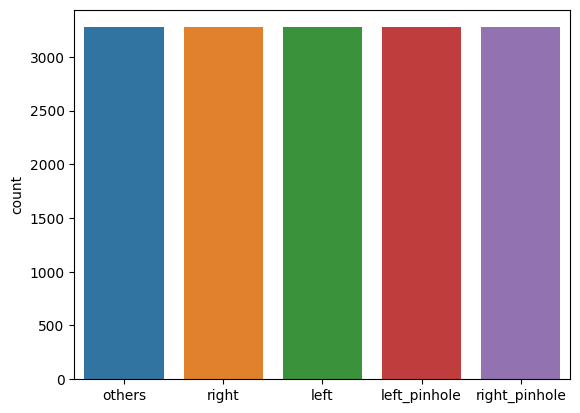

In [ ]:
sns.countplot(x=[action_labels[x] for x in labels_resampled])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_resampled, labels_resampled, test_size=0.2, random_state=42)

In [ ]:
oversampler = RandomOverSampler(sampling_strategy='minority')
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

In [ ]:
y_resampled

array([1, 0, 3, ..., 1, 1, 1])

<Axes: ylabel='count'>

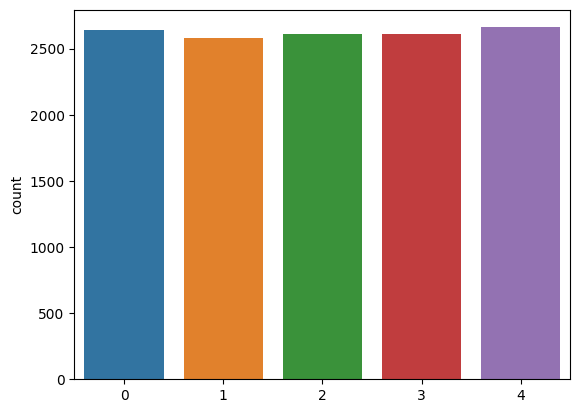

In [ ]:
sns.countplot(x=y_train)

<Axes: ylabel='count'>

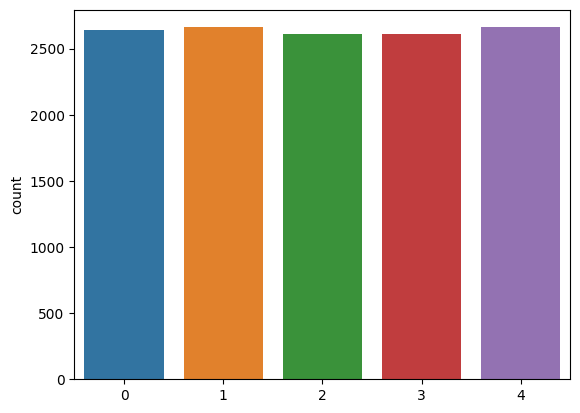

In [ ]:
import seaborn as sns

sns.countplot(x=y_resampled)

In [ ]:
clf = svm.SVC(kernel='linear')


In [ ]:
clf.fit(X_train, y_train)


SVC(kernel='linear')

In [ ]:
y_pred = clf.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)


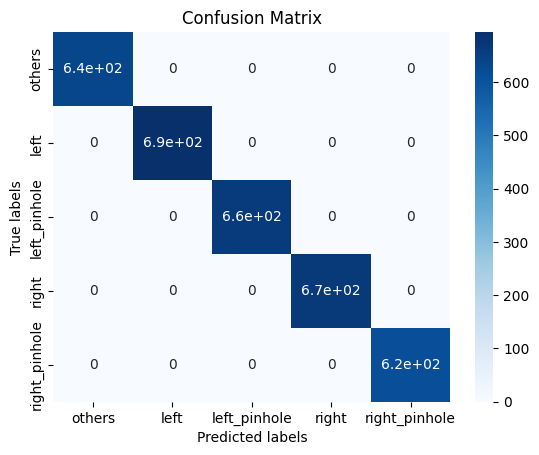

In [ ]:
import matplotlib.pyplot as plt

# Create a heatmap of the confusion matrix
sns.heatmap(conf_mat, annot=True, cmap='Blues', xticklabels=action_labels, yticklabels=action_labels)

# Set the axis labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
import pickle
# save the model to a file
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(clf, f)